<a href="https://colab.research.google.com/github/saurabhiitg/paper-notes/blob/main/%E2%80%9CCOMP0124_MAAI_2024_Lab_5a_Value_based_RL_no_answer_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP0124 MAAI Lab 5a Value based Reinforcement Learning

## Instructions
1.   To start this notebook, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the coding assignment and practice, please write your code at `### TODO ###` blocks or in a new cell. For analysis report, you are free to use as many blocks as you need.
3. If you have any questions, please contact TAs: [Oliver Slumbers](o.slumbers@cs.ucl.ac.uk), [Xihan Li](xihan.li.20@ucl.ac.uk), [Xidong Feng](xidong.feng.20@cs.ucl.ac.uk), and [Mengyue Yang](m.yang@cs.ucl.ac.uk).

# Section I: The basics of Markov decision process (MDP)

A Markov decision process (MDP) is a Markov reward process with
decisions. It is an environment in which all states are Markov dependent, which means that the future is independent of the past given the present. A state $S_{t}$ is Markov if and only if

$$
\mathbb{P}\left[S_{t+1} \mid S_{t}\right]=\mathbb{P}\left[S_{t+1} \mid S_{1}, \ldots, S_{t}\right]
$$

A Markov Decision Process is a tuple $\langle\mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma\rangle$
* S is a finite set of states
* A is a finite set of actions
* P is a state transition probability matrix, $\mathcal{P}_{s s^{\prime}}^{a}=\mathbb{P}\left[S_{t+1}=s^{\prime} \mid S_{t}=s, A_{t}=a\right]$
* R is a reward function, $\mathcal{R}_{s}^{a}=\mathbb{E}\left[R_{t+1} \mid S_{t}=s, A_{t}=a\right]$
* $\gamma$ is a discount factor $\gamma \in[0,1]$.

The state-value function $v_{\pi}(s)$ of an MDP is the expected return starting from state $s$, and then following policy $\pi$

$$
V_{\pi}(s)=\mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1} \mid S_{t}=s\right]
$$

The action-value function $q_{\pi}(s, a)$ is the expected return starting from state $s$, taking action $a$, and then following policy $\pi$


$$
Q_{\pi}(s, a)=\mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1} \mid S_{t}=s, A_{t}=a\right]
$$



where a policy $\pi$ is a distribution over actions given states,

$$
\pi(a \mid s)=\mathbb{P}\left[A_{t}=a \mid S_{t}=s\right]
$$

From the definition above, we can derive the Bellman Expectation Equation over value function:

$$
V_{\pi}(s)=\sum_{a \in \mathcal{A}} \pi(a \mid s) Q_{\pi}(s, a) \tag{1}
$$

$$
Q_{\pi}(s, a)=\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} V_{\pi}\left(s^{\prime}\right) \tag{2}
$$

$$
V_{\pi}(s)=\sum_{a \in \mathcal{A}} \pi(a \mid s)\left(\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} V{\pi}\left(s^{\prime}\right)\right) \tag{3}
$$


$$
Q_{\pi}(s, a)=\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} \sum_{a^{\prime} \in \mathcal{A}} \pi\left(a^{\prime} \mid s^{\prime}\right) Q_{\pi}\left(s^{\prime}, a^{\prime}\right) \tag{4}
$$


The optimal state-value function $V_{*}(s)$ is the maximum value function over all policies

$$
V_{*}(s)=\max _{\pi} V_{\pi}(s)
$$

The optimal action-value function $Q_{*}(s, a)$ is the maximum action-value function over all policies

$$
Q_{*}(s, a)=\max _{\pi} Q_{\pi}(s, a)
$$

And the Bellman Optimal Equation can be derived as:
$$
V_{*}(s)=\max _{a} Q_{*}(s, a) \tag{5}
$$

$$
Q_{*}(s, a)=\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} V_{*}\left(s^{\prime}\right) \tag{6}
$$

$$
V_{*}(s)=\max _{a} \mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} V_{*}\left(s^{\prime}\right) \tag{7}
$$


$$
Q_{*}(s, a)=\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} \max _{a^{\prime}} Q_{*}\left(s^{\prime}, a^{\prime}\right)\tag{8}
$$

# Section II: Model-based learning (Policy Iteration/Value Iteration)

When the environment is known for us, we can solve for the optimal value function and optimal policy by dynamic programming. Two classical algorithms of dynamic programming is Policy Iteration (PI) and Value Iteration (VI).

The core of **policy iteration** is the alternating procedure between policy evaluation and policy improvement.
* In policy evaluation phase, we need to estimate the value function of current policy $\pi$ by iterative applying the Bellman Expectation Equation (equation (3)) until the value function $V_{\pi}$ converges.
* In policy improvement phase, we improve the policy from $\pi$ to $\pi^{\prime}$ by acting greedily with respect to $V_{\pi}$.

The detailed algorithm procedures are shown as follows:

<div align=center><img src="https://i.stack.imgur.com/kKZx7.png" width="500px" /></div>

The core of **value iteration** is to directly obtain the optimal value function.
* Value iteration aims at obtaining optimal value function to derive the final optimal policy. It iteratively applies Bellman Optimal Equation update (equation (7)) until the optimal value function converges.

The detailed algorithm procedures are shown as follows:

<div align=center><img src="https://i.stack.imgur.com/CAAu5.png" width="500px" /></div>


## Q1: Policy Iteration on the Shortest Path Problem in Gridworld

In this part, we use the shortest path problem in gridworld to illustrate how policy iteration works.

The shortest path problem utilises an $N\times N$ gridworld as its map, where $N$ refers to the length. The following figure shows an example when $N=4$.

<div align=center><img src="https://miro.medium.com/max/1290/1*aP4jWZ0vbCzH4Gb2MqedtQ.png" width="500px" /></div>

This environment has the following chacteristics:
* An undiscounted episodic MDP (with $\gamma=1$)
* 14 non-terminal states from 1 to 14
* Two terminal states (shaded squares)
* Actions leading out of the grid leave state unchanged
* Reward is -1 until the terminal state is reached

In this part, **you need to do the following things**:
* Complete the implementation of policy iteration on this problem with $N=6, \gamma=1.0$. To finish the implementation, you need to complete 4 functions. **next_state**: given current row/column index and action, return the row/column index of next state. **get_q_matrix**:  calculate Q value matrix from V value matrix. **evaluate_policy**:  evaluate the V value matrix given a fixed policy by iteratively applying Bellman Expectation Equation update. **get_optimal**: Generate the greedy policy given the Q value matrix.
* Visualising the final policy.


In [ ]:
import numpy as np
import copy

In [ ]:
### policy iteration

### For action, 0 for up, 1 for left, 2 for down and 3 for right
### the policy is dim*dim*4
### The V matrix is dim*dim
### The Q matrix is dim*dim*4

dim = 6
gamma = 1.0
eps = 1e-4

def next_state(i, j, action, num):
  ### i refers to the row index
  ### j refers to column index
  ### action is in [0,1,2,3],
  ### num is the dimension of square.

  ### TODO: return the index of next state, remember to handle corner case
  ### Everytime when the agent locates at the edge of the square,
  ### illegal action will not change the position of agent
  ### For example: (i=0, j=2), (row 0 column 2) when taking action = 0(up), the position will still be (i=0, j=2)
  ### (i=1, j=2), (row 1 column 2) when taking action = 0(up), the position will still be (i=0, j=2)

  ### END
  return next_i, next_j

def get_q_matrix(value_matrix):# calculate Q value from V
  num = len(value_matrix)
  q_matrix = np.zeros([num, num, 4])
  for i in range(num):
    for j in range(num):
      if (i == 0 and j == 0) or (i == num-1 and j == num-1): # skip terminal state
        continue
      for action in range(4):
        next_i, next_j = next_state(i, j, action, num)
        if (next_i == 0 and next_j == 0) or (next_i == num-1 and next_j == num-1):
          next_value = 0
        else:
          next_value = value_matrix[next_i, next_j]
        ### TODO : calculate the Q function q_matrix[i,j,action], refer to equation (2)

        ### END
  return q_matrix

def evaluate_policy(policy, eps):# policy evaluation by iteratively applying Bellman Equation update
  num = len(policy)
  value_matrix = np.random.randn(num,num)
  value_matrix[0,0] = 0 # for terminal state, set state value as 0
  value_matrix[-1,-1] = 0 # for terminal state, set state value as 0
  while True:
    value_prev = copy.deepcopy(value_matrix)
    for i in range(num):
      for j in range(num):
        value = 0
        if (i == 0 and j == 0) or (i == num-1 and j == num-1): # skip terminal state
          continue
        for action in range(4): # 0 for up, 1 for left, 2 for down and 3 for right
          next_i, next_j = next_state(i, j, action, num)
          if (next_i == 0 and next_j == 0) or (next_i == num-1 and next_j == num-1):
            next_value = 0
          else:
            next_value = value_prev[next_i, next_j]
          ### TODO : calculate the state value function for value_matrix[i][j], refer to equation (3)

          ### END
        value_matrix[i][j] = value
    diff = np.mean((value_prev-value_matrix)**2) ## calculate the difference
    if diff < eps: ## if less then the thresold, break
      break
  return value_matrix

def get_optimal(q_matrix): #greedy policy from Q/policy improvement
  num = len(q_matrix)
  policy = np.ones([num,num,4])/4
  for i in range(num):
    for j in range(num):
      # ignore terminal state
      if (i == 0 and j == 0) or (i == num-1 and j == num-1): # skip terminal state
          continue
      q_value = q_matrix[i,j]

      ### TODO : Get greedy policy given Q matrix
      ### Let the action with the same max Q value has the same probability, while the rest are 0
      ### For example: with Q value = [1,1,0], the policy is [0.5, 0.5, 0]
      ### With Q value = [0,1,0], thc policy is [0, 1, 0]

      ### END
      policy[i, j] = policy_state
  return policy

In [ ]:
def policy_iteration(dim, eps):
  policy = np.ones([dim,dim,4])/4 # uniform policy
  while True:
    prev_policy = copy.deepcopy(policy)
    value_matrix = evaluate_policy(policy, eps)# policy evaluation
    q_matrix = get_q_matrix(value_matrix)# calculate Q value from V
    policy = get_optimal(q_matrix)# greedy policy from Q
    diff = np.mean((prev_policy-policy)**2)# whether the difference is smaller than thresold
    if diff < eps:
      print('converge')
      break
  return policy, value_matrix

In [ ]:
policy, value_matrix = policy_iteration(dim, eps)
print(policy)
print(value_matrix)

Visualising the learned policy

In [ ]:
### Visualising the learned policy
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
def visualse(policy):
  plt.figure(figsize=(dim,dim))
  ax = plt.gca()
  x_major_locator=MultipleLocator(1)
  ax.xaxis.set_major_locator(x_major_locator)
  ax.yaxis.set_major_locator(x_major_locator)
  plt.xlim(0, dim)
  plt.ylim(0, dim)

  for i in range(dim):
    for j in range(dim):
      if (i == 0 and j == 0) or (i == dim-1 and j == dim-1): # skip terminal state
        continue
      for action, action_prob in enumerate(policy[i,j]):
        if action_prob > 0:
          if action == 0:
            x_distance = 0
            y_distance = 0.3
          elif action == 1:
            x_distance = -0.3
            y_distance = 0
          elif action == 2:
            x_distance = 0
            y_distance = -0.3
          elif action == 3:
            x_distance = 0.3
            y_distance = 0
          plt.arrow(j+0.5, dim-i-0.5, x_distance, y_distance, head_width=0.05, head_length=0.1, fc='k', ec='k')
        else:
          continue
  plt.grid(True)
  plt.show()

visualse(policy)

## Q2: Value Iteration on the Shortest Path Problem in Gridworld

In this part, we use the shortest path problem in gridworld to illustrate how value iteration works.

In this part, **you need to do the following things**:
* Complete the implementation of value iteration on this problem with $N=5, \gamma=0.9$. To finish the implementation, you need to complete 1 function. **update_optimal_value_function**: conduct optimal Bellman Equation update iteratively.
* Visualising the final policy.


In [ ]:
gamma = 0.9
dim = 5

### value iteration
def update_optimal_value_function(optimal_value_matrix):
  value_matrix = copy.deepcopy(optimal_value_matrix)
  num = len(optimal_value_matrix)
  for i in range(num):
    for j in range(num):
      value = 0
      if (i == 0 and j == 0) or (i == num-1 and j == num-1): # skip terminal state
        continue
      max_value = -np.inf
      for action in range(4): # 0 for up, 1 for left, 2 for down and 3 for right
        next_i, next_j = next_state(i, j, action, num)
        if (next_i == 0 and next_j == 0) or (next_i == num-1 and next_j == num-1):
          next_value = 0
        else:
          next_value = value_matrix[next_i, next_j]
        ### TODO: Conduct Bellman optimal equation update, refer to equation 7

        ### END
      optimal_value_matrix[i][j] = max_value
  return optimal_value_matrix

def value_iteration():
  optimal_value_matrix = np.random.randn(dim, dim)
  optimal_value_matrix[0,0] = 0
  optimal_value_matrix[-1,-1] = 0
  while True:
    prev_optimal_value_matrix = copy.deepcopy(optimal_value_matrix)
    optimal_value_matrix = update_optimal_value_function(optimal_value_matrix) # Bellman optimal equation update
    # get optimal q matrix from optimal V matrix, reuse previous function because equation (2) = (6)
    optimal_q_matrix = get_q_matrix(optimal_value_matrix)
    optimal_policy = get_optimal(optimal_q_matrix)# get optimal policy from optimal Q matrix
    diff = np.mean((prev_optimal_value_matrix-optimal_value_matrix)**2) # calculate the difference
    if diff < eps:
      print('converge')
      break
  return optimal_policy, optimal_value_matrix

In [ ]:
optimal_policy, optimal_value_matrix = value_iteration()
print(optimal_policy)
print(optimal_value_matrix)

In [ ]:
visualse(optimal_policy)

# Section III: Model-free learning

## Q3: Q Learning and Sarsa

In this part, you will complete the implementation of Q-Learning and Sarsa for the Cliff Walking task introduced in [Example 6.6 of Sutton's RL book (page 154)](http://incompleteideas.net/book/RLbook2020.pdf#page=154).

We implemented the CliffWalking environment for you by the following code. When you want to play with this environment class, first instantiate the class by specifying the number of rows `num_rows` and columns `num_cols` for the grid world (the initial point of the agent will be at `(num_rows - 1, 0)`), then use `step(action)` method to move a single step in this environment, and get the next state of the agent after the move:

- `action = 0`: move left (y coord - 1)
- `action = 1`: move up (x coord - 1)
- `action = 2`: move right (y coord + 1)
- `action = 3`: move down (x coord + 1)

The state of this task is the coordinates of the agent in the grid world, and we use a single integer `state_id = x_coord * num_cols + y_coord` to denote the id of the state. E.g., in a grid sized `(4, 12)`, `state_id = 15` means that the coordinates of the agent is at `(1, 3)` since `15 = 1 * 12 + 3`.

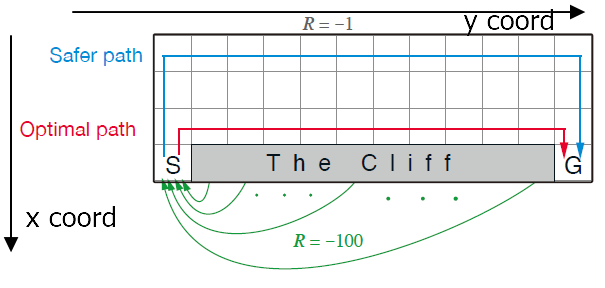

In [ ]:
import numpy as np

class CliffWalking():
    def __init__(self, num_rows, num_cols):
        self.num_rows = num_rows
        self.num_cols = num_cols
        self.num_states = self.num_rows * self.num_cols
        self.grid = np.zeros((self.num_rows, self.num_cols), dtype=np.bool)
        self.grid[3, (self.num_rows + 1):(self.num_cols - 1)] = True
        self.mov = list(map(np.array, [[0, -1], [-1, 0], [0, 1], [1, 0]]))
        self.reset()

    def reset(self):
        self.loc = np.array([self.num_rows - 1, 0], dtype=np.int)
        return self.state_id(self.loc)

    def state_id(self, state):
        return state[0] * self.num_cols + state[1]

    def step(self, action):
        self.loc += self.mov[action]
        self.loc[0] = 0 if self.loc[0] < 0 else (self.num_rows - 1) if self.loc[0] >= self.num_rows else self.loc[0]
        self.loc[1] = 0 if self.loc[1] < 0 else (self.num_cols - 1) if self.loc[1] >= self.num_cols else self.loc[1]
        next_state = self.state_id(self.loc)
        if self.grid[tuple(self.loc)]:
            self.reset()
            return next_state, -100, True
        else:
            if tuple(self.loc) == (self.num_rows - 1, self.num_cols - 1):
                return next_state, -1, True
            return next_state, -1, False

The first task for you is to implement an ϵ-greedy policy, a simple method to balance exploration and exploitation by choosing between exploration and exploitation randomly. See chapter 2 of Sutton's RL book for details.

$$ action = \begin{cases}\text{a random action} & \text{with probability }\epsilon \\ \arg \max_a Q(s, a) & \text{with probability }1 - \epsilon \end{cases} $$

Tips:
- Here `q_table` is a 2-D NumPy array with shape `(num_states, num_actions)`. `q_table[state, action]` denotes the Q-value for the state with id `state` and the action with id `action`.
- you may use `np.argmax` to simplify your implementation. [[NumPy Docs]](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

In [ ]:
num_rows, num_cols = 4, 12
env = CliffWalking(num_rows, num_cols)
num_episodes = 500
learning_rate = 0.5
gamma = 1.     # delay factor
epsilon = 0.1


def epsilon_greedy(epsilon, q_table, state):
    if np.random.rand() < epsilon:
        ### TODO: randomly select an action from (0, 1, 2, 3) ###

        ### END TODO ###
    else:
        ### TODO: for current state, select the action that has the maximum Q-value in the Q-table ###

        ### END TODO ###

Then you can complete the Sarsa and Q-learning implementations by implementing the update of Q-table.

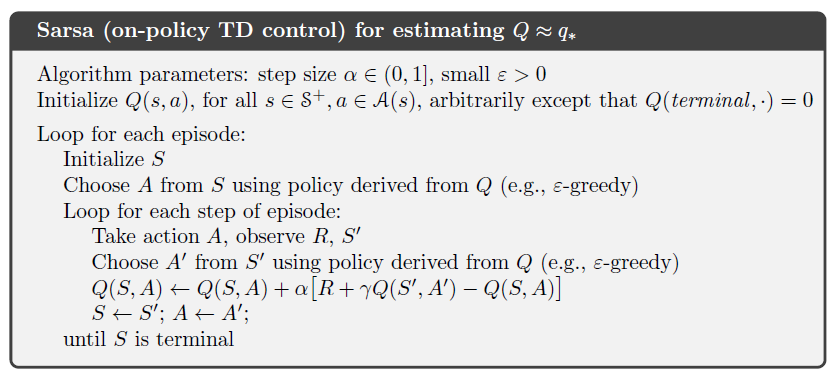

In [ ]:
# Sarsa
def sarsa():
    sarsa_rewards = []
    q_table = np.random.rand(env.num_states, 4)
    q_table[num_rows * num_cols - 1, :] = 0.
    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy(epsilon, q_table, state)
        cumulated_reward = 0
        while True:
            next_state, reward, done = env.step(action)
            cumulated_reward += reward
            next_action = epsilon_greedy(epsilon, q_table, next_state)
            ### TODO: implement the update of Q-table for Sarsa ###

            ### END TODO ###
            if done:
                break
            state, action = next_state, next_action
        sarsa_rewards.append(cumulated_reward)
    return sarsa_rewards

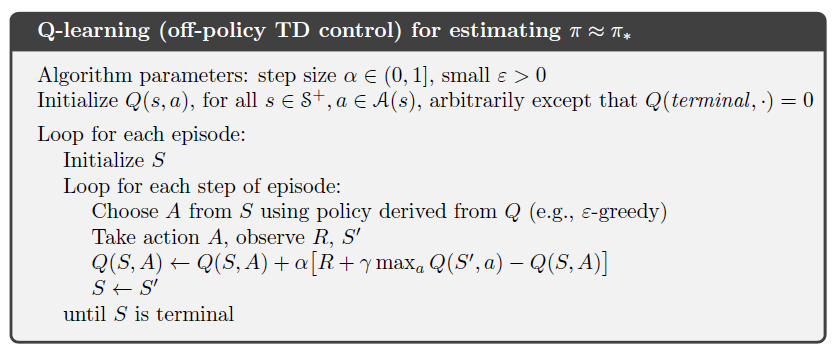

In [ ]:
# Q-learning
def q_learning():
    q_learning_rewards = []
    q_table = np.random.rand(env.num_states, 4)
    q_table[num_rows * num_cols - 1, :] = 0.
    for episode in range(num_episodes):
        state = env.reset()
        cumulated_reward = 0
        while True:
            action = epsilon_greedy(epsilon, q_table, state)
            next_state, reward, done = env.step(action)
            cumulated_reward += reward
            ### TODO: implement the update of Q-table for Q-Learning ###

            ### END TODO ###
            if done:
                break
            state = next_state
        q_learning_rewards.append(cumulated_reward)
    return q_learning_rewards

Then we use the following code to run the Sarsa and Q-learning implementions, and compare their performance on the Cliff Walking task.

In [ ]:
import matplotlib.pyplot as plt

num_replicate = 20
sarsa_rewards_avg = np.mean([sarsa() for _ in range(num_replicate)], axis=0)
q_learning_rewards_avg = np.mean([q_learning() for _ in range(num_replicate)], axis=0)
plt.plot(range(num_episodes), sarsa_rewards_avg, label='Sarsa')
plt.plot(range(num_episodes), q_learning_rewards_avg, label='Q-learning')
plt.ylim(-100, 0)
plt.xlabel('episodes')
plt.ylabel('sum of rewards (averaged over %d replicates)' % num_replicate)
plt.legend()
plt.show()

## Q4: Deep Q Network

Please check [Playing Atari with Deep Reinforcement Learning](https://arxiv.org/abs/1312.5602) for the details of the DQN algorithm.

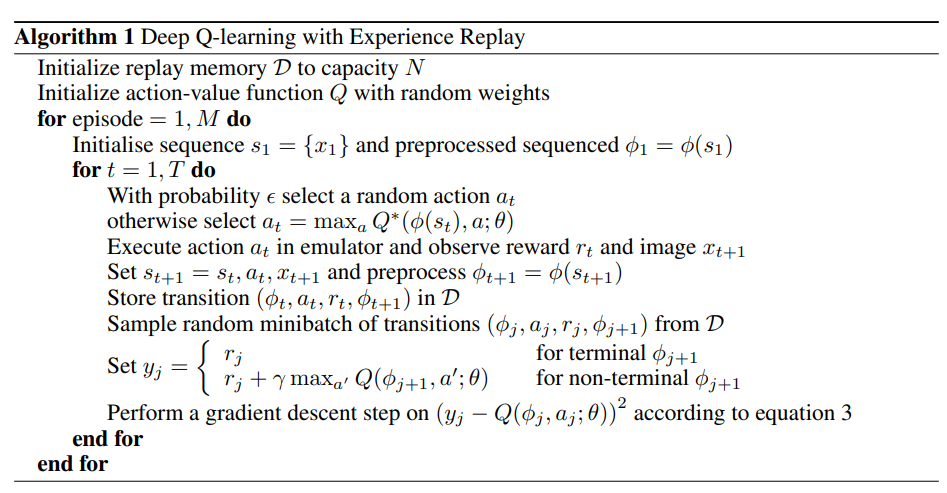

In [ ]:
import tensorflow as tf
import numpy as np
import gym
import random
from collections import deque

num_episodes = 100              # The total number of episodes for training
num_exploration_episodes = 90   # The number of episodes in the exploration process
max_len_episode = 200           # The maximum number of rounds for each episode
batch_size = 32                 # batch size
learning_rate = 1e-3            # learning rate
gamma = 1.                      # discount factor
initial_epsilon = 1.            # Exploration rate at the beginning of exploration
final_epsilon = 0.01            # Exploration rate at the end of exploration


class QNetwork(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=24, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=24, activation=tf.nn.relu)
        self.dense3 = tf.keras.layers.Dense(units=2)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

    def predict(self, inputs):
        q_values = self(inputs)
        return tf.argmax(q_values, axis=-1)


if __name__ =='__main__':
    env = gym.make('CartPole-v0') # Instantiate a game environment, the parameter is the game name
    model = QNetwork()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    replay_buffer = deque(maxlen=10000) # Use a deque as the experience replay pool for Q Learning
    epsilon = initial_epsilon
    for episode_id in range(num_episodes):
        state = env.reset() # Initialize the environment and get the initial state
        epsilon = max( # Calculate the current exploration rate
            initial_epsilon * (num_exploration_episodes-episode_id) / num_exploration_episodes,
            final_epsilon)
        for t in range(max_len_episode):
            # env.render() # Render the current frame and draw to the screen (offline, cannot work in colab)
            if random.random() <epsilon: # epsilon-greedy Explore strategy, choose random action with epsilon probability
                action = env.action_space.sample() # Select random action (exploration)
            else:
                action = model.predict(np.expand_dims(state, axis=0)).numpy() # Select the action with the largest Q Value calculated by the model
                action = action[0]

            # Let the environment execute the action, get the next state after the action is executed, the reward of the action, whether the game is over, and additional information
            next_state, reward, done, info = env.step(action)
            # If the game is Game Over, give a big negative reward
            reward = -10. if done else reward
            # Put the four-tuple of (state, action, reward, next_state) (plus the done tag to indicate whether it is over) into the experience playback pool
            replay_buffer.append((state, action, reward, next_state, 1 if done else 0))
            # Update the current state
            state = next_state

            if done: # When the game is over, exit the current loop and proceed to the next episode
                print("episode %4d, epsilon %.4f, score %4d"% (episode_id, epsilon, t))
                break

            if len(replay_buffer) >= batch_size:
                # Randomly take a batch of quadruples from the experience replay pool and convert them to NumPy arrays respectively
                batch_state, batch_action, batch_reward, batch_next_state, batch_done = \
                    map(np.array, zip(*random.sample(replay_buffer, batch_size)))

                q_value = model(batch_next_state)
                y = batch_reward + (gamma * tf.reduce_max(q_value, axis=1)) * (1 - batch_done) # calculate y value
                with tf.GradientTape() as tape:
                    loss = tf.keras.losses.mean_squared_error( # Minimize the distance between y and Q-value
                        y_true=y,
                        y_pred=tf.reduce_sum(model(batch_state) * tf.one_hot(batch_action, depth=2), axis=1)
                    )
                grads = tape.gradient(loss, model.variables)
                optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables)) # Calculate the gradient and update the parameters

The following code is for the visualization of the trained model on the CartPole task.

In [ ]:
!pip install pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

In [ ]:
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
env = wrap_env(gym.make('CartPole-v0'))
state = env.reset()

while True:
    env.render()
    action = model.predict(np.expand_dims(state, axis=0)).numpy()[0]
    state, reward, done, info = env.step(action)

    if done:
        break;

env.close()
show_video()

#Reference
The illustration of VI/PI refers to:
* https://www.davidsilver.uk/wp-content/uploads/2020/03/DP.pdf

The VI/PI algorithm refers to:
* http://incompleteideas.net/book/RLbook2020.pdf

Refer code to draw the grid plot in VI/PI:
* https://www.kaggle.com/nvtnganfb/gridworld